In [2]:
import pandas as pd

df = pd.read_csv("Tweets.csv")

# Check the structure
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
%pip install textblob vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/itami-
[nltk_data]     macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Sentiment Analysis with TextBlob

from textblob import TextBlob

df['textblob_polarity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def get_textblob_sentiment(p):
    if p > 0:
        return "positive"
    elif p < 0:
        return "negative"
    else:
        return "neutral"

df['textblob_sentiment'] = df['textblob_polarity'].apply(get_textblob_sentiment)

df[['text', 'airline_sentiment', 'textblob_sentiment']].head(10)


,text,airline_sentiment,textblob_sentiment
0,@VirginAmerica What @dhepburn said.,neutral,neutral
1,@VirginAmerica plus you've added commercials t...,positive,neutral
2,@VirginAmerica I didn't today... Must mean I n...,neutral,negative
3,@VirginAmerica it's really aggressive to blast...,negative,positive
4,@VirginAmerica and it's a really big bad thing...,negative,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive,positive
7,@VirginAmerica Really missed a prime opportuni...,neutral,positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive,positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive,positive


In [6]:
# Sentiment Analysis with VADER

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply VADER analysis to each tweet
df['vader_scores'] = df['text'].apply(lambda x: analyzer.polarity_scores(str(x)))

# Extract compound score
df['vader_compound'] = df['vader_scores'].apply(lambda score: score['compound'])

# Label sentiment
def get_vader_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df['vader_sentiment'] = df['vader_compound'].apply(get_vader_sentiment)

df[['text', 'airline_sentiment', 'vader_sentiment']].head(10)


,text,airline_sentiment,vader_sentiment
0,@VirginAmerica What @dhepburn said.,neutral,neutral
1,@VirginAmerica plus you've added commercials t...,positive,neutral
2,@VirginAmerica I didn't today... Must mean I n...,neutral,neutral
3,@VirginAmerica it's really aggressive to blast...,negative,negative
4,@VirginAmerica and it's a really big bad thing...,negative,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive,positive
7,@VirginAmerica Really missed a prime opportuni...,neutral,positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive,positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive,positive


In [7]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Comparing VADER & TextBlob with actual sentiment.

from sklearn.metrics import classification_report

print("TextBlob Results:")
print(classification_report(df['airline_sentiment'], df['textblob_sentiment']))

print("VADER Results:")
print(classification_report(df['airline_sentiment'], df['vader_sentiment']))


TextBlob Results:
              precision    recall  f1-score   support

    negative       0.88      0.35      0.50      9178
     neutral       0.32      0.57      0.41      3099
    positive       0.33      0.76      0.46      2363

    accuracy                           0.46     14640
   macro avg       0.51      0.56      0.46     14640
weighted avg       0.67      0.46      0.48     14640

VADER Results:
              precision    recall  f1-score   support

    negative       0.90      0.44      0.59      9178
     neutral       0.39      0.32      0.35      3099
    positive       0.28      0.91      0.43      2363

    accuracy                           0.49     14640
   macro avg       0.52      0.56      0.46     14640
weighted avg       0.69      0.49      0.51     14640



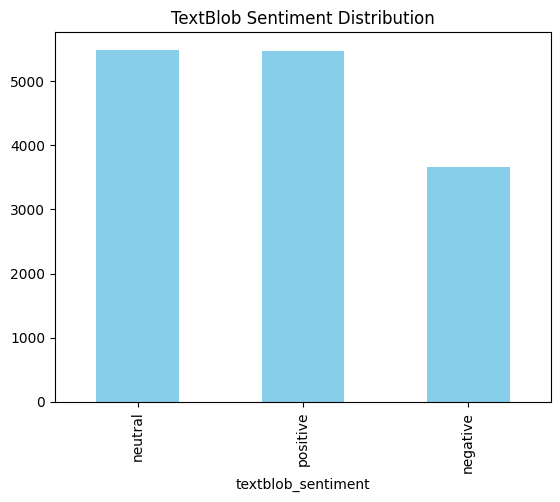

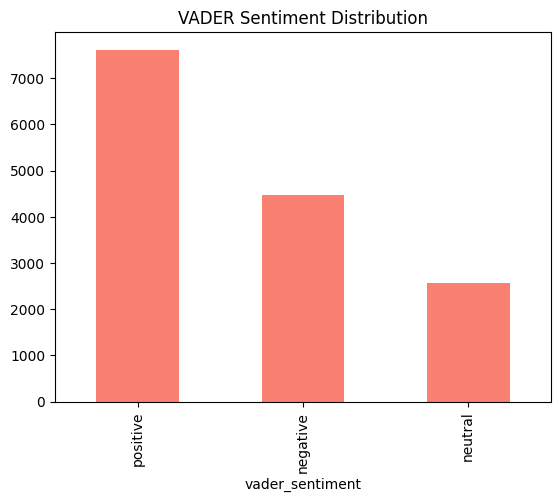

In [9]:
# Plot
import matplotlib.pyplot as plt

df['textblob_sentiment'].value_counts().plot(kind='bar', title='TextBlob Sentiment Distribution', color='skyblue')
plt.show()

df['vader_sentiment'].value_counts().plot(kind='bar', title='VADER Sentiment Distribution', color='salmon')
plt.show()
